<a href="https://colab.research.google.com/github/bani1610/Machine-Learning-Praktikum/blob/main/praktikum03/notebook/Regresi02.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

path = "/content/drive/MyDrive/praktikum-ml/Praktikum03/Data"

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Membaca data file CSV

In [ ]:
import pandas as pd

df = pd.read_csv(path + "/stunting_wasting_dataset.csv")
df.head()

,Jenis Kelamin,Umur (bulan),Tinggi Badan (cm),Berat Badan (kg),Stunting,Wasting
0,Laki-laki,19,91.6,13.3,Tall,Risk of Overweight
1,Laki-laki,20,77.7,8.5,Stunted,Underweight
2,Laki-laki,10,79.0,10.3,Normal,Risk of Overweight
3,Perempuan,2,50.3,8.3,Severely Stunted,Risk of Overweight
4,Perempuan,5,56.4,10.9,Severely Stunted,Risk of Overweight


 # Menghitung statistik deskriptif pada kolom numeric dengan describe

In [ ]:
df.describe()

,Umur (bulan),Tinggi Badan (cm),Berat Badan (kg)
count,100000.000000,100000.000000,100000.000000
mean,11.992580,73.132657,9.259256
std,7.199671,11.360846,3.300780
min,0.000000,42.600000,1.000000
25%,6.000000,65.500000,6.900000
50%,12.000000,74.200000,9.200000
75%,18.000000,81.400000,11.700000
max,24.000000,97.600000,17.200000


#  Data Pre-processing


In [ ]:
df1 = (df[["Berat Badan (kg)", "Jenis Kelamin", "Umur (bulan)", "Tinggi Badan (cm)"]]
       .rename(columns={"Jenis Kelamin":"jk", "Umur (bulan)": "umur_bln",
                       "Tinggi Badan (cm)": "tinggi_cm", "Berat Badan (kg)": "berat_kg"}).copy())

df1["jk"] = df1["jk"].map({"Laki-laki": 1, "Perempuan":0 })
df1.head()

,berat_kg,jk,umur_bln,tinggi_cm
0,13.3,1,19,91.6
1,8.5,1,20,77.7
2,10.3,1,10,79.0
3,8.3,0,2,50.3
4,10.9,0,5,56.4


# Analisis Korelasi

In [ ]:
corr_matrix = df1.corr()
print(corr_matrix)

           berat_kg        jk  umur_bln  tinggi_cm
berat_kg   1.000000  0.045797  0.665389   0.626005
jk         0.045797  1.000000  0.004046   0.073505
umur_bln   0.665389  0.004046  1.000000   0.875869
tinggi_cm  0.626005  0.073505  0.875869   1.000000


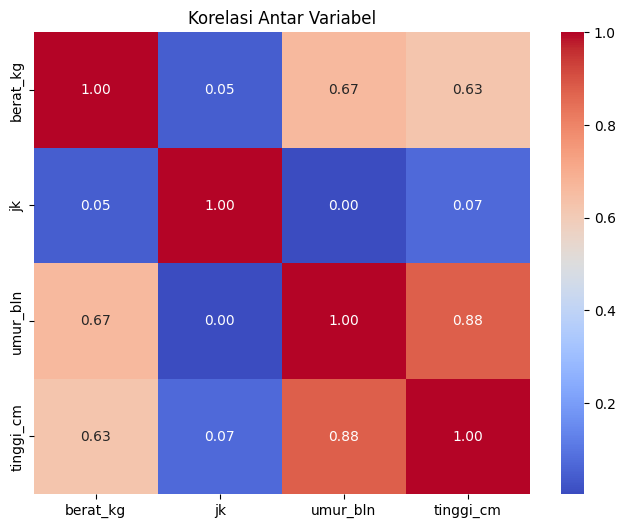

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Korelasi Antar Variabel")
plt.show()

# Membagi dataset untuk Training dan Test


In [ ]:
from sklearn.model_selection import train_test_split

# Misalkan Target (Y) adalah badan, # Variabel dependen
y = df1[["berat_kg"]]

X = df1[["umur_bln", "tinggi_cm"]]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)

print("Jumlah data train :", len(X_train))
print("Jumlah data test :", len(X_test))

X_train.head()

Jumlah data train : 80000
Jumlah data test : 20000


,umur_bln,tinggi_cm
75220,2,51.9
48955,13,74.3
44966,17,86.7
13568,16,76.8
92727,20,78.5


# Pemodelan

In [ ]:
import statsmodels.api as sm

X_train_const = sm.add_constant(X_train)
X_train_const.head()

,const,umur_bln,tinggi_cm
75220,1.0,2,51.9
48955,1.0,13,74.3
44966,1.0,17,86.7
13568,1.0,16,76.8
92727,1.0,20,78.5


In [ ]:
model = sm.OLS(y_train, X_train_const).fit()
print('-----------------------------')
print(model.params)
print('-----------------------------')
const = model.params['const']
x1_umur = model.params['umur_bln']
x2_tinggi = model.params['tinggi_cm']

print(f"y = {const:.3f} + {x1_umur:.3f} * x1 + {x2_tinggi:.3f} * x2")

-----------------------------
const        2.545617
umur_bln     0.229719
tinggi_cm    0.054192
dtype: float64
-----------------------------
y = 2.546 + 0.230 * x1 + 0.054 * x2


In [ ]:
print(model.summary())

# Evaluasi Model

# Pengujian model dengan data testing

In [ ]:
import numpy as np
import pandas as pd
import statsmodels.api as sm

X_test_const = sm.add_constant(X_test)

y_pred_test = model.predict(X_test_const)

hasil = pd.DataFrame({
    "Umur (bulan)": X_test["umur_bln"].to_numpy(),
    "Tinggi (cm)": X_test["tinggi_cm"].to_numpy(),
    "Berat Aktual (kg)": y_test.to_numpy().flatten(),
    "Berat Prediksi (kg)": y_pred_test
})

hasil["Selisih error (kg)"] = hasil["Berat Prediksi (kg)"] - hasil["Berat Aktual (kg)"]

denom = hasil["Berat Aktual (kg)"].replace(0, np.nan)
hasil["Akurasi (%)"] = ( 1 - (hasil["Selisih error (kg)"].abs() / denom)).clip(lower=0, upper=1) * 100

hasil

,Umur (bulan),Tinggi (cm),Berat Aktual (kg),Berat Prediksi (kg),Selisih error (kg),Akurasi (%)
75721,1,54.6,7.0,5.734226,-1.265774,81.917510
80184,8,66.0,12.2,7.960047,-4.239953,65.246290
19864,20,90.0,10.9,12.017284,1.117284,89.749692
76699,13,82.4,9.6,9.997392,0.397392,95.860500
92991,11,70.1,13.2,8.871391,-4.328609,67.207511
...,...,...,...,...,...,...
32595,9,67.3,11.8,8.260216,-3.539784,70.001830
29313,15,80.2,9.6,10.337607,0.737607,92.316595
37862,8,61.9,8.0,7.737860,-0.262140,96.723246
53421,12,74.9,5.4,9.361232,3.961232,26.643845


# Tugas Mandiri

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

df3 = pd.read_csv(path + "/day.csv")
df3.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [ ]:
df3.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


In [ ]:
print("\n=== Missing Values ===")
print(df3.isnull().sum())

# Hapus kolom yang tidak relevan atau menyebabkan data leakage
df3 = df3.drop(columns=['instant', 'dteday', 'casual', 'registered'])

# Pilih fitur dan target
features = ['temp', 'atemp', 'hum', 'windspeed', 'season', 'yr', 'mnth', 'holiday', 'workingday']
target = 'cnt'

X = df3[features]
y = df3[target]


=== Missing Values ===
instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64



=== Korelasi terhadap cnt ===
cnt           1.000000
atemp         0.631066
temp          0.627494
yr            0.566710
season        0.406100
mnth          0.279977
weekday       0.067443
workingday    0.061156
holiday      -0.068348
hum          -0.100659
windspeed    -0.234545
weathersit   -0.297391
Name: cnt, dtype: float64


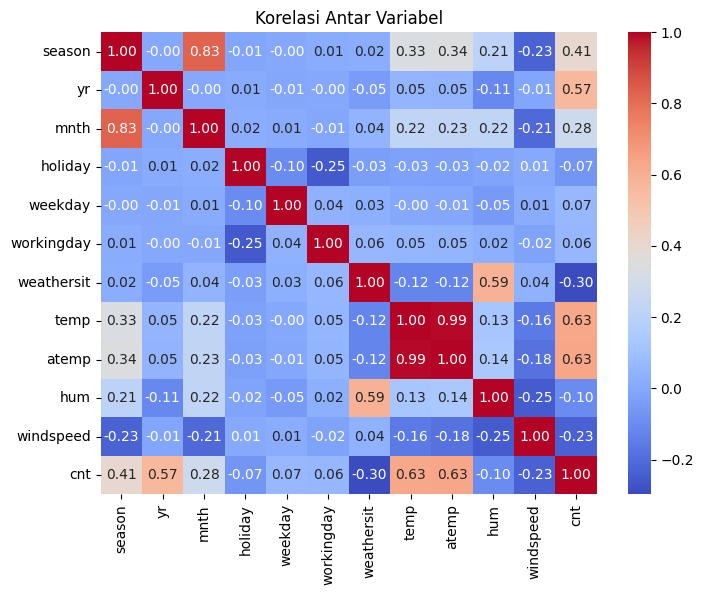

In [ ]:
print("\n=== Korelasi terhadap cnt ===")
corr_matrix = df3.corr(numeric_only=True)
print(corr_matrix['cnt'].sort_values(ascending=False))

# Visualisasi heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Korelasi Antar Variabel")
plt.show()

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print("\nUkuran Dataset:")
print("Train:", X_train.shape, "Test:", X_test.shape)


Ukuran Dataset:
Train: (584, 9) Test: (147, 9)


In [ ]:
model = LinearRegression()
model.fit(X_train, y_train)

# Tampilkan koefisien regresi
coef_df = pd.DataFrame({
    'Feature': features,
    'Coefficient': model.coef_
}).sort_values(by='Coefficient', ascending=False)
print("\n=== Koefisien Regresi ===")
print(coef_df)


=== Koefisien Regresi ===
      Feature  Coefficient
1       atemp  3798.667183
0        temp  2163.141230
5          yr  1991.176854
4      season   513.862373
8  workingday   121.267614
6        mnth   -33.299398
7     holiday  -478.680520
2         hum -2546.841402
3   windspeed -2928.048389


In [ ]:
y_pred = model.predict(X_test)
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

print("\n=== Evaluasi Model ===")
print(f"R² Score : {r2:.4f}")
print(f"MAE      : {mae:.2f}")
print(f"RMSE     : {rmse:.2f}")


=== Evaluasi Model ===
R² Score : 0.8181
MAE      : 614.38
RMSE     : 853.94



=== Contoh Hasil Prediksi ===
     Actual    Predicted     Residual
703    6606  5859.961782   746.038218
33     1550  1379.489826   170.510174
300    3747  3265.662553   481.337447
456    6041  4824.457349  1216.542651
633    7538  6640.612639   897.387361
557    7264  7043.260171   220.739829
39     1605  1254.294992   350.705008
356    2209  1585.569587   623.430413
559    7499  7726.007310  -227.007310
514    5743  6143.734164  -400.734164


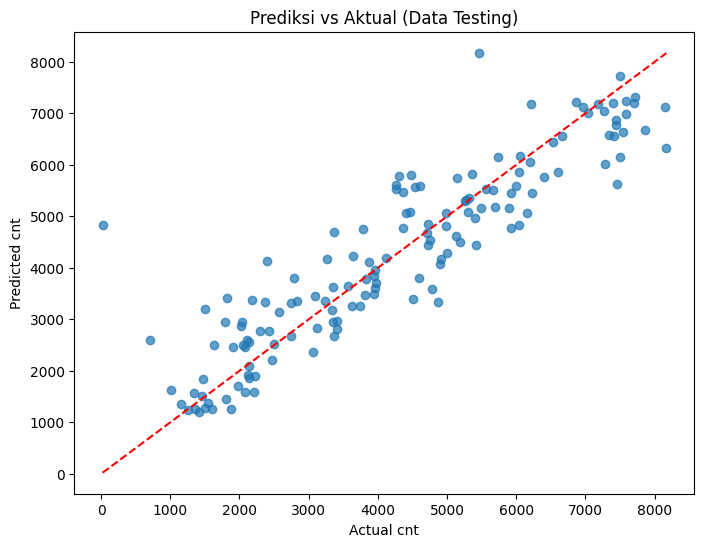

In [ ]:
results = pd.DataFrame({
    'Actual': y_test,
    'Predicted': y_pred,
    'Residual': y_test - y_pred
})
print("\n=== Contoh Hasil Prediksi ===")
print(results.head(10))

# Visualisasi Prediksi vs Aktual
plt.figure(figsize=(8,6))
plt.scatter(results['Actual'], results['Predicted'], alpha=0.7)
plt.plot([results['Actual'].min(), results['Actual'].max()],
         [results['Actual'].min(), results['Actual'].max()],
         color='red', linestyle='--')
plt.xlabel('Actual cnt')
plt.ylabel('Predicted cnt')
plt.title('Prediksi vs Aktual (Data Testing)')
plt.show()

# Visualisasi Residual
plt.figure(figsize=(8,5))
plt.hist(results['Residual'], bins=25, color='skyblue', edgecolor='black')
plt.title('Distribusi Residual')
plt.xlabel('Residual')
plt.ylabel('Frekuensi')
plt.show()
